#**Precio de las viviendas en EEUU, CA.**

##**Introducción**
En el año 1997, el periodico *Statistics and Probability Letter* publicó un articulo escrito por Pace R. Kelly y Ronald Barry titulado *Sparse Spatial Autoregression* (Escasa Autoregresión Espacial) sobre el precio de la vivienda en el estado de California, Estados Unidos en el año 1990. El presente documento realizará un análisis exploratorio sobre los datos de dicho articulo.

###**Obtención de los datos.**
Gracias a la labor estadistica de la empresa *StatLib* y al esfuerzo informático del profesor Luís Torgo de la Universidad de Porto, ha sido posible la recaudación de los datos necesarios para la realización de este análisis. También puede ser encontrado sin acreditar en la plataforma [KAGGLE](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

---


#**Inicializando y planteando la estructura a usar para los datos** 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#contrucción de modelos
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg

cali = pd.read_csv('https://raw.githubusercontent.com/IsaacMartindeDiego/IA/master/datasets/california_housing.csv')


#**Datos**
Se plantean una serie de variables categoricas para procesar los datos y realizar una visualización de los mismos y que cualquier persona pueda entenderlos con facilidad.

Se trabajará con un *dataset* de 20640 y 10 variables

In [ ]:
cali.shape

(20640, 10)

Ahora se plantea las variables (*o columnas*) existentes

In [ ]:
cali.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Nos damos cuenta de la existencia de 207 valores faltantes o *nulos* en el *dataset* bajo la variable *total_bedrooms*. Este problema lo resolveremos más adelante en el análisis para presentar una idea más clara.

In [ ]:
print(cali.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


Se renombran las variables para un mejor entendimiento y posterior visualización de posibles gráficas. Se usa el método *head* para visualizar el cambio.

In [ ]:
cali=cali.rename(columns={'longitude':'Longitud','latitude':'Latitud','housing_median_age':'Antiguedad','total_rooms':'Habitaciones','population':'Habitantes','households':'Casas','median_income':'Ingresos','median_house_value':'Coste','ocean_proximity':'Proximidad'})
cali.head(5)

,Longitud,Latitud,Antiguedad,Habitaciones,total_bedrooms,Habitantes,Casas,Ingresos,Coste,Proximidad
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Se entiende que la variable *total_rooms* (ahora llamada "Habitaciones") hace referencia al total de ambientes que posee una vivienda, lo cual nos da una mejor idea de el tamaño real de la misma, mientras que la variable *total_bedrooms* hace referencia sólo a los cuartos personales. 

La variable "Proximidad" hace referencia a la proximidad de la vivienda al oceano.

Se descarta la ultima variable mencionada y comprobamos.

In [ ]:
cali = cali.drop(['total_bedrooms'], axis = 1)
cali.head(5)

,Longitud,Latitud,Antiguedad,Habitaciones,Habitantes,Casas,Ingresos,Coste,Proximidad
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,NEAR BAY


---

##Variables faltantes
Dada la cantidad del *dataset*, debemos saber con certeza si algunas de estas variables tiene valores faltantes o *nulos*.

In [ ]:
print(cali.isnull().sum())

Longitud        0
Latitud         0
Antiguedad      0
Habitaciones    0
Habitantes      0
Casas           0
Ingresos        0
Coste           0
Proximidad      0
dtype: int64


Como resultado de la eliminación de la variable *total_bedrooms* hemos eliminado los valores nulos que se encontraron con anterioridad.


##Valores atípicos

Los valores atípicos son una de las principales razones por las que se obtiene un modelo menos preciso.

En este reporte encontraremos dichos valores para hacer una apreciación y poder visualizar con más detalle mediante gráficas usando la *caja de variables o diagrama de caja* como método de representación. Para ello utilizaremos las variables "Habitantes" y "Coste".

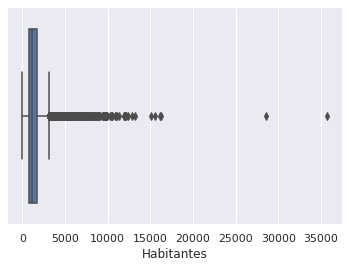

In [ ]:
sns.boxplot(x=cali['Habitantes'])

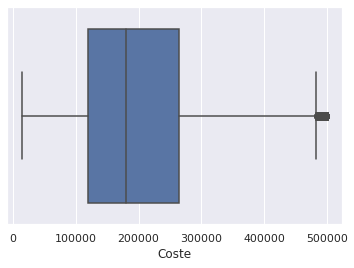

In [ ]:
sns.boxplot(x=cali['Coste'])

Se puede apreciar que bajo la variable Habitantes la media de valores está dentro de los 500 a 2500 teniendo al mismo tiempo en cuenta valores fuera de dicha media que van desde los 5000 hasta los 35000.

Con la variables Coste se visualiza la caja con mucha más facilidad, lo que nos dice que hay muchos más variables dentro de la media, siendo esta entre los 110.000 a los 275.000 dólares como coste de la vivienda en California para este año.

Dado que la existencia de valores atípicos en la gráfica de la variable coste es mucho menor, se puede concluir que los datos son más precisos.

---

#Encontrando relación entre las variables y la representación de la misma.

Para este apartado se hace uso del método *Scatterplot* como principal herramienta para este estudio. Para ello se estudió la relación entre las variables Habitantes con respecto a los datos bajo la variable Habitaciones.

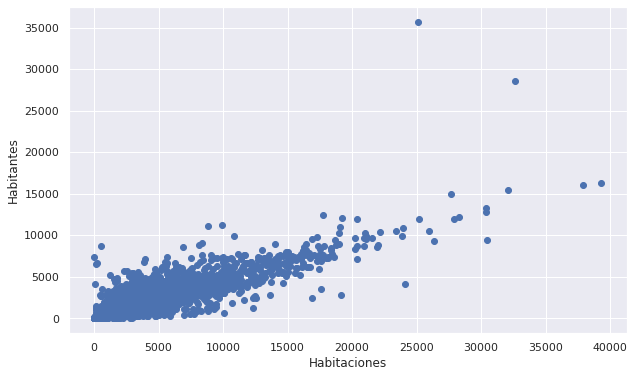

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(cali['Habitaciones'], cali['Habitantes'])
ax.set_xlabel('Habitaciones')
ax.set_ylabel('Habitantes')
plt.show()

Se puede ver con facilidad que ambas variables guardan una estrecha relación entre sí, llegando a la conclusión lógica, a mientras más habitantes, más habitaciones habrá.

Este método puede ser muy útil y versátil, no sólo lo podemos utilizar para encontrar y/o representar relaciones entre los datos sino posibles errores que haya dentro de los mismos. En este caso, se desarrolla la relación entre las variables "Antigüedad" y "Coste" y logramos ver que podemos llegar a segmentar el *dataset* en partes para una mayor comprensión.

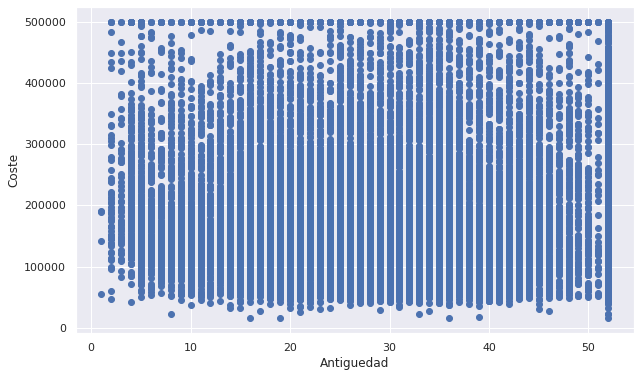

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(cali['Antiguedad'], cali['Coste'])
ax.set_xlabel('Antiguedad')
ax.set_ylabel('Coste')
plt.show()

Se puede visualizar la relación entre todas las variables de una manera mucho menos gráfica y menos entendible.

In [ ]:
cali.corr()

,Longitud,Latitud,Antiguedad,Habitaciones,Habitantes,Casas,Ingresos,Coste
Longitud,1.000000,-0.924664,-0.108197,0.044568,0.099773,0.055310,-0.015176,-0.045967
Latitud,-0.924664,1.000000,0.011173,-0.036100,-0.108785,-0.071035,-0.079809,-0.144160
Antiguedad,-0.108197,0.011173,1.000000,-0.361262,-0.296244,-0.302916,-0.119034,0.105623
Habitaciones,0.044568,-0.036100,-0.361262,1.000000,0.857126,0.918484,0.198050,0.134153
Habitantes,0.099773,-0.108785,-0.296244,0.857126,1.000000,0.907222,0.004834,-0.024650
Casas,0.055310,-0.071035,-0.302916,0.918484,0.907222,1.000000,0.013033,0.065843
Ingresos,-0.015176,-0.079809,-0.119034,0.198050,0.004834,0.013033,1.000000,0.688075
Coste,-0.045967,-0.144160,0.105623,0.134153,-0.024650,0.065843,0.688075,1.000000


###Heatmap

Confirmamos numéricamente que la correlación más alta se da entre *Habitaciones* y *Casas* pero muy cerca también vemos la relación entre *Habitantes* y *Casas*. Obviamente la diagonal de la matriz de correlaciones es 1. Es posible visualizar estos resultados de manera gráfica.

Como caso opuesto, tenemos el escenario donde las variables no guarden ninguna relación entre sí, como es el caso de Longitud y Latitud con valores de -0

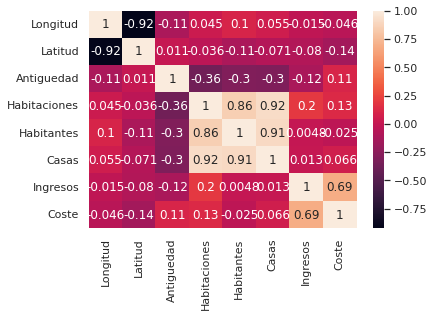

In [ ]:
sns.heatmap(cali.corr(), annot=True)

Una vez determinadas las relaciones más estrechas entre las variables de manera alternativa, se puede gráficar la relación entre dichas variables para verla de una forma más específica. Esto se puede lograr mediante la herramienta *regplot* de la librería *matplotlib.pyplot* que se decidido nombrar como plt para facilitar su uso. 

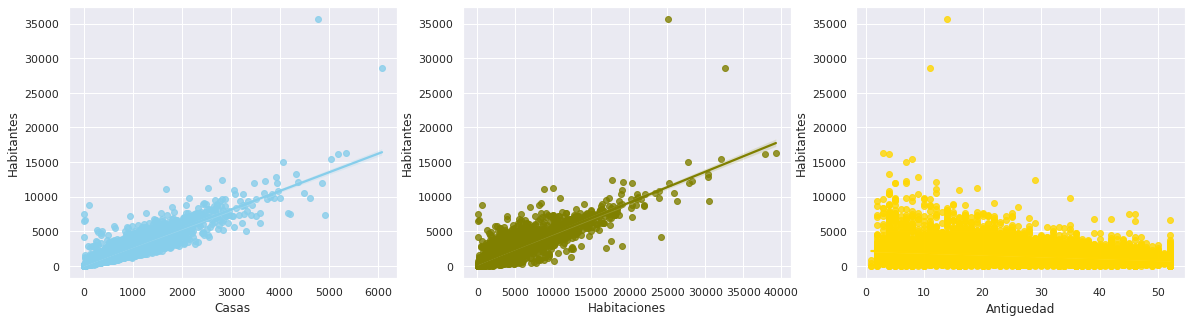

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
sns.regplot(data=cali, x="Casas", y= "Habitantes", color="skyblue", ax=axs[0])
sns.regplot(data=cali, x="Habitaciones", y="Habitantes", color="olive", ax=axs[1])
sns.regplot(data=cali, x="Antiguedad", y="Habitantes", color="gold", ax=axs[2])

plt.show()

En cualquier reporte de análisis de datos, se debe colocar la cuenta de los datos dentro de sus valores.

Como ejemplo, se han colocado las variables Longitud, Latitud y Coste de manera visual para comprender su totalidad dentro del compendio de datos.

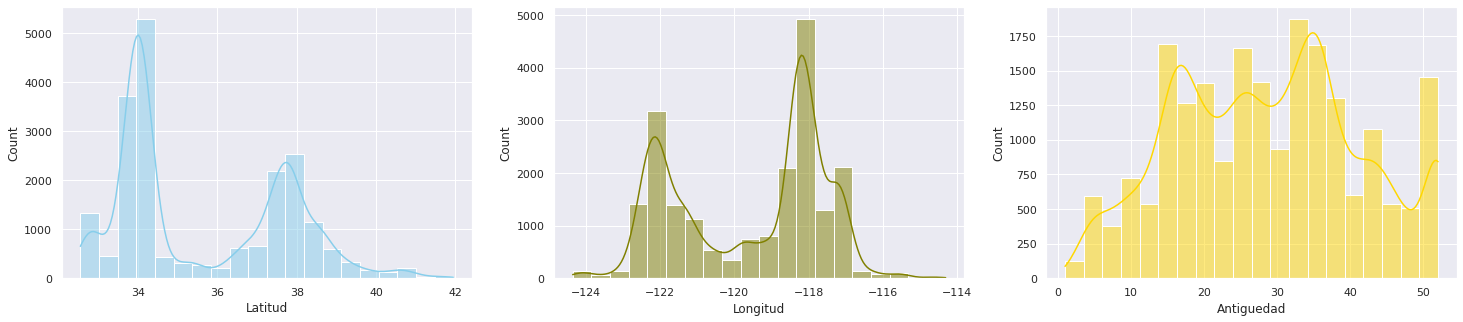

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 3, figsize=(25, 5))

sns.histplot(data=cali, x="Latitud", kde=True, color="skyblue", ax=axs[0],bins=20)
sns.histplot(data=cali, x="Longitud", kde=True, color="olive", ax=axs[1],bins=20)
sns.histplot(data=cali, x="Antiguedad", kde=True, color="gold", ax=axs[2],bins=20)


plt.show()

###La variable Proximidad

Como parte de la transparencia y la fidelidad del reporte, es conveniente mencionar que, el censo realizado en 1990 (el *dataset* original), no contenía la esta variable, la misma fue agregada años despues como una forma de agregar información categórica a los datos.

Podemos observar el comportamiento de dicha variable, sabiendo que sus posibles valores son "*NEAR BAY*", "*INLAND*", "*ISLAND*" y "*NEAR THE OCEAN*", (cerca de la bahía, en tierra, isla y cerca del océano)

In [ ]:
cali.head(10)

,Longitud,Latitud,Antiguedad,Habitaciones,Habitantes,Casas,Ingresos,Coste,Proximidad
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


---

Se crea una copia del *dataset*. Como se verá posteriormente, el apartado de modelización, con el actual compendio de datos, requiere de la modificación de la variable "Coste" a binaria para usar dicha variable durante todo el apartado sin alterar los datos originales.

In [ ]:
cali_copy = cali.copy()

#Modelización
Para entender la utilidad de la modelización, se inicializará un modelo de predicción usando el método del *K número de vecinos* para aprovechar de manera más análitica el compendio presentado. Comenzamos por cambiar la variable "Coste" a entero.

In [ ]:
cali_copy['Coste'] = (cali_copy['Coste'] >= 300000).astype(int)

A modo de buscar saber en completitud el *dataset*, podemos averiguar la dsitribución de una cierta variable y la pasamos a binaria.

In [ ]:
print("Frecuencia por clase:\n{}".format({n: v for n, v in zip(cali_copy.Casas, np.bincount(cali_copy.Coste))}))

Frecuencia por clase:
{126.0: 16774, 1138.0: 3866}


In [ ]:
#Le damos formato a los valores
print('Nombres de las variables:{}'.format(cali_copy.Coste))

Nombres de las variables:0        1
1        1
2        1
3        1
4        1
        ..
20635    0
20636    0
20637    0
20638    0
20639    0
Name: Coste, Length: 20640, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(cali_copy[["Antiguedad","Habitaciones","Habitantes","Longitud","Latitud","Ingresos"]],
                                              cali_copy[["Coste"]],
                                              random_state=0)
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (15480, 6)
y_train shape: (15480, 1)
X_test shape: (5160, 6)
y_test shape: (5160, 1)


In [ ]:
#se pasa las variables asociadas al modelo para visualización
df = pd.DataFrame(X_train,columns=cali_copy.Coste)

#comprobamos
df.head()

Coste,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Instanciamos el modelo *K número de vecinos*
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [ ]:
prediction=knn.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

Como buena practica, comprobamos la precisión del modelo y buscamos subir dicho valor lo máximo prosible. Cabe tener en cuenta que el actual *dataset* no es el más idóneo para este tipo de practicas. Se comprueba que el valor es lo más alto posible, en el caso actual, 0.78, lo máximo siendo 1

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.7790697674418605

##Mátriz de confusión


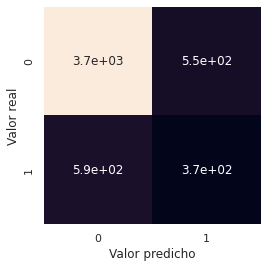

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt


mat = confusion_matrix(y_test, prediction)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('Valor predicho')
plt.ylabel('Valor real');

Como se puede evidenciar, la matriz no nos devuelve resultado *legibles* a primera vista (valores enteros), pero si analisamos los valores obtenidos, podemos ver que en 1-1 el modelo falla mucho y en 0-0 acierta mucho.

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

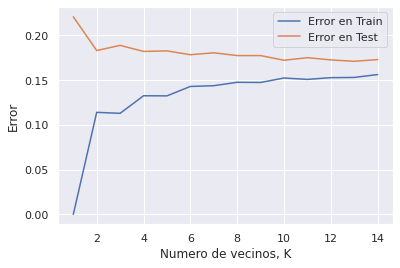

In [ ]:
training_error=[]
test_error=[]
# n vecinos de 1 a 15
neighbors_setting=range(1,15)

for n_neighbores in neighbors_setting:
    clf=KNeighborsClassifier(n_neighbors=n_neighbores)
    clf.fit(X_train,y_train)
    training_error.append(1-clf.score(X_train,y_train))
    test_error.append(1-clf.score(X_test,y_test))

ax=plt.subplot(111)
plt.plot(neighbors_setting,training_error,label='Error en Train')
plt.plot(neighbors_setting,test_error,label='Error en Test')
ax.legend()
plt.ylabel('Error')
plt.xlabel('Numero de vecinos, K')
plt.show()

Como conclusión de nuestro modelo, se puede observar como el valor de error mínimo en *K* se ha colocado a 1, pero el porcentaje de error en Test dentro de ese rango es muy elevado. Sin embargo, a medida que el ambos, el modelo y su entrenamiento han avanzado, también es claro como el porcentaje de error aumenta progresivamente directamente inverso al porcentaje de error en Train, lo que nos dice que ambos procesos progresivamente llegarían a coincidir si se extiende el rango de la prueba.

In [ ]:
cali.head(5)

,Longitud,Latitud,Antiguedad,Habitaciones,Habitantes,Casas,Ingresos,Coste,Proximidad
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#Clustering (Aprendizaje *no supervisado*)

In [ ]:
cali.columns

Index(['Longitud', 'Latitud', 'Antiguedad', 'Habitaciones', 'Habitantes',
       'Casas', 'Ingresos', 'Coste', 'Proximidad'],
      dtype='object')

In [ ]:
cali_cust = cali[["Antiguedad","Habitaciones","Habitantes"]]
cali_cust.head()

,Antiguedad,Habitaciones,Habitantes
0,41.0,880.0,322.0
1,21.0,7099.0,2401.0
2,52.0,1467.0,496.0
3,52.0,1274.0,558.0
4,52.0,1627.0,565.0


##Evaluación

Se combina la predicción de los clusters con el *dataset* original

In [ ]:
# Copia de los datos para no modificar el dataset original y perjudicar la trazabilidad de los mismos en el resto del análisis
cali_copy = cali.copy()

# Preprocesado
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cali = cali.apply(le.fit_transform)
cali.head()

,Longitud,Latitud,Antiguedad,Habitaciones,Habitantes,Casas,Ingresos,Coste,Proximidad
0,170,515,40,733,296,125,12416,3665,3
1,171,513,20,5255,2346,1129,12411,3074,3
2,169,512,51,1316,469,176,11941,3017,3
3,168,512,51,1123,531,218,10269,2917,3
4,168,512,51,1476,538,258,6656,2925,3


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(cali)
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
#Creamos la variable para implementar nuestro metodo en la identificación
prediction = kmeans.predict(cali)

kmeans.cluster_centers_


array([[4.38554393e+02, 3.15879480e+02, 2.90784064e+01, 1.96168929e+03,
        1.29864744e+03, 4.69806349e+02, 3.32530444e+03, 1.05167873e+03,
        1.17645989e+00],
       [4.33010056e+02, 2.82963923e+02, 2.59994817e+01, 2.58735414e+03,
        1.34293500e+03, 5.02121708e+02, 9.06321584e+03, 2.20788265e+03,
        1.15374248e+00]])

In [ ]:
#Reseteamos la copia creada
cali = cali_copy.reset_index()

In [ ]:
clustersDf = pd.DataFrame(prediction)
clustersDf.columns = ['Prediccion del cluster']
combinedDf = pd.concat([cali, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

###Identificación de datos

In [ ]:
cluster_0 = combinedDf[combinedDf['Prediccion del cluster'] == 0]
cluster_1 = combinedDf[combinedDf['Prediccion del cluster'] == 1]

In [ ]:
#Verificación del cluster 0
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10987 entries, 7 to 20639
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Longitud                10987 non-null  float64
 1   Latitud                 10987 non-null  float64
 2   Antiguedad              10987 non-null  float64
 3   Habitaciones            10987 non-null  float64
 4   Habitantes              10987 non-null  float64
 5   Casas                   10987 non-null  float64
 6   Ingresos                10987 non-null  float64
 7   Coste                   10987 non-null  float64
 8   Proximidad              10987 non-null  object 
 9   Prediccion del cluster  10987 non-null  int32  
dtypes: float64(8), int32(1), object(1)
memory usage: 901.3+ KB


In [ ]:
#Verificación del cluster 1
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9653 entries, 0 to 20625
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Longitud                9653 non-null   float64
 1   Latitud                 9653 non-null   float64
 2   Antiguedad              9653 non-null   float64
 3   Habitaciones            9653 non-null   float64
 4   Habitantes              9653 non-null   float64
 5   Casas                   9653 non-null   float64
 6   Ingresos                9653 non-null   float64
 7   Coste                   9653 non-null   float64
 8   Proximidad              9653 non-null   object 
 9   Prediccion del cluster  9653 non-null   int32  
dtypes: float64(8), int32(1), object(1)
memory usage: 791.8+ KB


Intentamos analizar una de las variables para comprobar el funcionamiento de ambos clusters, en este caso utilizaremos *Antiguedad*

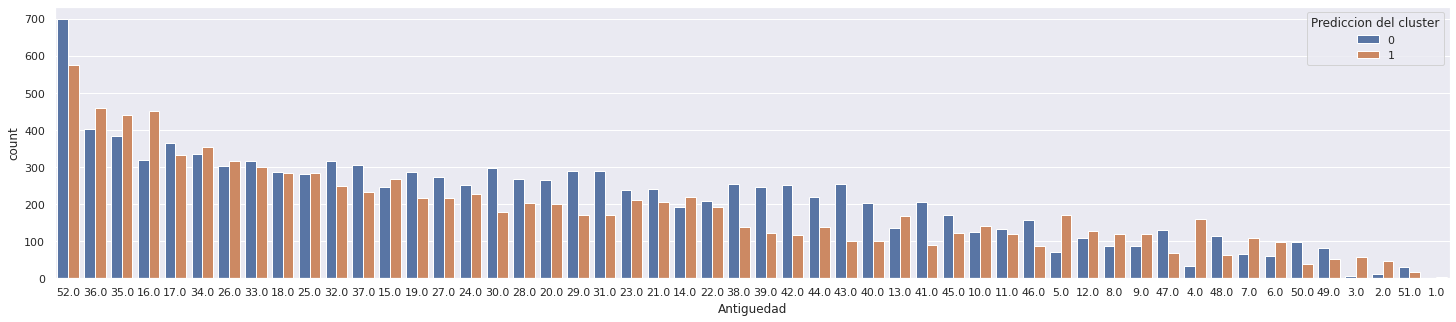

In [ ]:
plt.subplots(figsize = (25,5))
sns.countplot(x=combinedDf['Antiguedad'],order=combinedDf['Antiguedad'].value_counts().index, hue=combinedDf['Prediccion del cluster'])
plt.show()

Como se puede evidenciar, los *clusters* funcionan y nos deveulven predicciones distintas. Se puede decir que ambos *clusters* tienen *tendencias* diferentes.

Inicialmente, la gráfica anterior retornaba de una manera que los valores se solapaban entre sí. Se ha intentado hacer un *slicing* al *dataframe* en busca de reducir el tamaño de los datos agrupados en el conjunto usado para dicho análisis *no supervisado*. El método se ha abandonado al ser más practico aumentar el tamaño de visualización sin necesidad del *slicing*

Para completitud del estudio, se realiza un mapa de calor donde el tamaño de los circulos representa la cantidad de habitantes y los colores representan el coste de las viviendas siendo los colores frios más baratos y los colores más calientes representando las más caras.

In [ ]:
img = plt.imread("data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOEAAADhCAMAAAAJbSJIAAAAe1BMVEX///8AAADv7+/5+fnk5OT29vbIyMiNjY2+vr7V1dXa2tq4uLhzc3MjIyPMzMzExMSjo6OYmJhISEhUVFRZWVk9PT3i4uJhYWGlpaU3NzcmJiZ7e3sKCgrr6+urq6toaGhwcHBLS0uFhYUXFxc5OTmTk5MbGxsuLi4lJSX1q97XAAAGM0lEQVR4nOWdi1rySgxFOyByEUQQELxxUeG8/xMeWxQFghS6J3vTfz2An+tr6WQySSZJdrkPOIZ7f12BMdBwwpYxqQANH9kyJkjDDlvG5Alo+MyWsbgBCmoa3iINA9vGpNouu2GSdEpv2Cu9YRNnWGW72FRxhjW2ywHeYIYVtsoB+qU3xH1MX9gqNjWYYLhiu9hc4wxHbBebOs6wxXaxWZXd8AUnGG7ZMiavpTdcAA27bBkT4IcmNNgyJg2g4Q1bxua59IZLnOEr28WkhRMUNUTmacZsGQtkRjjcsW0skItF+GDbGEAfoaQh8lcYQp2ts88VVDAs2D77TMtuCH6EYcYW2gN5tCZpCMwFr5myjXZBbisyHthGu9yhDe/ZRrtgl/tP5myjPYZgwz5baI8Z2FCvZAi9WuiVDEErMYJkyVAXa/jG9jEAHnEH0YIabGjKtjGp4A65RQ2hFaZsFxtkpka03ASYyRA1TAalN8TFp6rlJrhyDFlDWPgmWlCT4CpORAtqEtxrKlpQkzLHGGqWm2SAKjKabI/DgAw1y00yQKGbsCEorNEsqMnACP4DhpolQxkgQ9GCmhSQoWa5SUb5DUGHwZIFNWtAB209tscflN8QU0irWFDzDWb/JFhQ8wPEUK/c5AfQHlg4qEFVLeh+a2Bp4Rnb5BC47qe+aloY1w78rJpTBFbxqW71gbUnohE4sNVSdWFEnngP2DI2yCkZK81TGmi1omaKH1p9ohnCQRU1N1NQxRnbxgTYvR7CUDKEw05Wkjw0xTbSKIZwWEPFEG6EK7DJUAzhsIaKIRxyDEFKRy+EA7+ngjUM9TlaUezgDdng/Y1UFi6GoFbfVzdM0c0mKWIhHLaKf41YCFeL8RjFQjh4b1uQC+FifHGe2FLbjHDz+DaItWFiZ9SueZQK4UYRDLVCuDhrv1IIB03a/EInC4feRm2QCeHgDe0bVEI45MUCO4iEcPDBEr/RCOFiLIgbNAr9gOPc9pEI4WIKSoRwyKNvC34WLrYhP4SL+jFdww7hwMOyLNgh3Dy+IjuEm8RXnHDvHKghpy4cghvCVYDXmBzkmqqIP6gxII8GrYfQj60pEMLB57vtwB8VhhxQb7Kkh3CxDfmt0g/xFcmbDfT0MwvuZsNBMBDf1FodOjf6D1ibjUcnv0BrEPMTZA1CffdUfGfki6Ml+G0YVeK+hozNhrMhYbPhbRja3oYe++BtvDcbMWqIjuAdwjl/TTOcQ7hbj9B7B+8Q7sNf0TuEQ48Az4FzCIe+MCIPzvliwk/ROV9c6zluozb4jtjy2ghv4RrCMZZF3xCuAry59ARcQziHrKLB0nNWA2FVTHEM4dCXKuTFr0o8XkHfEdxCuBbwas/T8AvhXq5Jko4hHPIi4ZPwy8JF6FTIh18IR1ozPEO4OUvRbdWI0RiVC79uTdbXxu81jV+byTbk7PhDePPb9MfowsyF27kNbo7dqbi9qJwNf4rjjKYrRmrKt+yW9LlxNCR9bhxz4f4Hi2vcPjasZd8vdiOcnK7pe2WmXv5jKYaJ08I/4qSIMwYupUWcBPEXLre7Eg6Gf3j3MIzbhXkEn9Y3oqBPV1ikwQt5cOrRiNjSfgSvVmlGmU1K27FiilGhEVZ+fsnXuMzn/mzqmSX2rQhr3LS+ootW3Sndz20+qTS7rx+LuN2nEqNDwLfTb0HuV/wm4ldWY27I5+u6Tvw/38P7M0We4SfjQb2RLlzwYxxu/7cFOnssMDVkF7Ch4IWZ4IcoeJ0NuFNaYj3cJv2crhqwnAdbx6CxzKaXgwqqhmwdk49VWgyDSbBKTV7epYp4U/WWwy2Kv6nSjzClaLG4wBCNYxRcOvrs/z8H1WKPUXC9Nyiyt5L/Ha4p8BjZ07Pycv6sNMWLT0zOnrLFHtWXm7PjmySpkYdn5eXcQo5lXydV8zdF6hw67H8+H0WWxcv4MRbJUAkmMiwKXBHGHpyVkwLbRfa/npezBdmzXXNz7oJBGrZ0Buf9EKcX8iNMOb2karXoCuYSD3PSirhqj28vyi4l58TJ+dNdV+O2gdP5+yB18rAYX4/EU2vHMGs5+rP6a7d14WYbfn1sOoOn3k3zMtIwJ5Du9YftXqNJn9Eai3oP9A35HwmHcD2D3eTkAAAAAElFTkSuQmCC")

In [ ]:
cali_plot = cali[['Longitud','Habitantes','Latitud','Coste']]

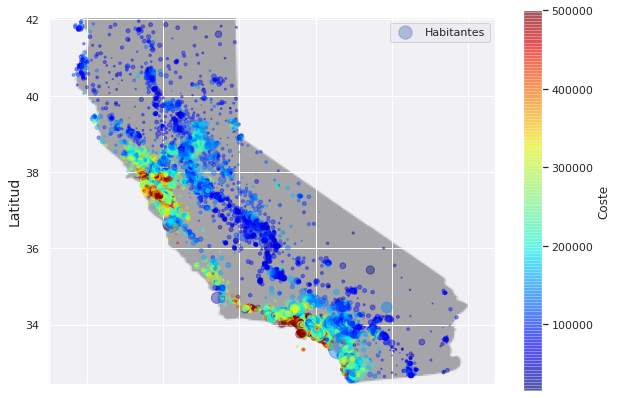

In [ ]:
cali_plot.plot(kind='scatter', x='Longitud', y='Latitud', alpha=0.4,
				s=cali['Habitantes']/100, label='Habitantes', figsize=(10,7),
				c='Coste', cmap=plt.get_cmap('jet'), colorbar=True)
plt.imshow(img, extent=[-125, -113.30, 32.45, 42.05], alpha=0.3)
plt.ylabel("Latitud", fontsize=14)
plt.xlabel("Longitud", fontsize=14)
plt.legend() 
plt.show()

#Evaluación y comparación de modelos

Teniendo en cuenta el *dataframe* y la carencia de alguno de los tipos de datos, se han planteado determinadas problemáticas y encontrado errores durante los diferentes métodos utilizados y etapas del análisis. Después de culminar dicho proceso, se puede ver con claridad que tanto el aprendizaje supervisado como el no supervisado tienen sus *pros and cons*, el primero sirve para entender mejor como funciona cada paso del método que se use, evidentemente, se presente como una técnica *manual* por ende puede llegar a parecer menos fiable, pero a diferencia del aprendizaje no supervisado, se visualiza mejor el margen de error (en este caso). En contraparte, este último es *automático*, es más cómodo y rápido de implementar, el entrenamiento del modelo será tan bueno como el *DF* y la implementación de las variables.

Con respecto al *dataframe*, se han encontrado incongruensias durante la implementación de las técnicas y métodos, *e.g*, la variable Antiguedad no guardando ninguna correlación con la variable Coste, se han intentado diferentes variables y diferentes tipos de variables en ambas técnicas y pudimos ver como las variables Antiguedad y Habitantes, de tipo entero, funcionan en el aprendizaje no supervisado y Coste no, en contraparte, Coste, de tipo *float* funciona mejor en el aprendizaje supervisado. La variable Proximidad se ha demostrado que poco funciona durante todo el análisis, incluso después de cambiarla a entera y binaria. La variable inicial *total_bedrooms* ha probado sólo otorgar margen de error y ambigüedad al *DF*, retornando 207 valores duplicados y guardando cerca de ninguna diferencia categórica de *total_rooms* (posteriormente llamada Habitaciones)

A modo de conclusión, hemos evidenciado como el aprendizaje supervisado es mejor para el estudiante, permitiendo no sólo ver paso a paso como evoluciona el método que se implemente sino también al ser *manual*, a diferencia del aprendizaje no supervisado, el cual resulta cómodo e interesante, pero *automático*. En el caso actual, se ha conseguido un porcentaje de precisión del 0.78% dandonos un margen de error del 22%, lo cual sirve para entender la importancia de escoger el método y técnica adecuado para el *dataframe* que se tenga a trabajar.

**Alfonso M. Armenta y Christofer E. Blanco, URJC-Antecendentes de la Inteligencia Artifical, 2022**